In [141]:
include("laser_rate_equations.jl")
using Plots, StatsBase, LaTeXStrings
gr()

Plots.GRBackend()

In [144]:
r = 5 # normalized bias [u.a.]
m =1/100 # modulation index [u.a.]
f0 = 10e9 # modulation frequncy [Hz]
τp = 5e-12 # Carrier lifetime [s]
τc = 180e-12 # Photon lifetime [s]
α = 3.8 # Linewidth enhancement factor

ϵ = τp/τc # Lifetime ratio
using StatsBase
Fs = (1:0.3:20)*1e9
Iw = []
ϕw = []

p=nothing

for fi in Fs
    plas = r, m, fi, τp, τc, α
    Np = 10 # number of periods to capture
    ti = 100/fi  # capture signal after few oscillations to avoid transient regime
    tf = ti + 10/fi
    N = 2^14

    E, _, t = integrate(plas, ti,tf, N);
    t=t.-t[1]
    # automatic point density 
    I = abs2.(E) # waveform intensity
    c = mean(I.*cis.(2π*fi*t)) # Fourier complex amplitude at fi
    append!(Iw, c .|> abs) # Fourier norm at fi
    append!(ϕw,angle.(c) .|> abs) # Fourier phase at fi

end


function H(f) # small perturbation transfer function = relaxation oscillations 
    ω = 2π*f
    1.0/(1-(ω*τp)^2/(ϵ*(r-1))-1im*ω*r*τp/(r-1))
end


H (generic function with 1 method)

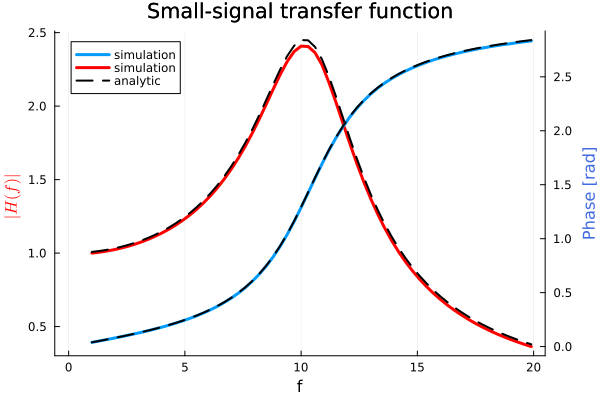

In [152]:

Hn = H.(Fs) 
begin 
plot(Fs/1e9, (Iw/Iw[1]),lw=3, color=:red, label=false)
plot!(Fs/1e9,(Hn .|> abs), lw=2, color=:black, ls=:dash, label=false)
ylabel!(L"|H(f)|")
xlabel!("f")
plot!(yguidefontcolor=:red)
p2=twinx()
plot!(p2,Fs/1e9, ϕw ,lw=3, label="simulation")
plot!(p2,[0.0], [0.0],lw=3, color=:red, label="simulation")
plot!(p2,Fs/1e9,Hn .|> angle, lw=2, color=:black, ls=:dash, label="analytic")
plot!(p2, ylabel="Phase [rad]")
plot!(p2,yguidefontcolor=:royalblue)
plot!(title="Small-signal transfer function")
end